This notebook allows you to visualize exploration and exploitation statistics for the Exploration in Malmo Continuous Mountain Cart EMC^2 experiment. make sure your data is in the run_saves/ folder.

In [76]:
import numpy as np
import os
import pylab
import seaborn
import scipy.stats as sp
import pickle
import matplotlib.pyplot as plt
import imageio
from scipy.spatial import distance
import json
from collections import OrderedDict
import os.path as osp
import pandas as pd
import copy
import scipy.stats as ss
DIV_LINE_WIDTH = 50

In [77]:
# Global vars for tracking and labeling data at load time.
exp_idx = 0
units = dict()

def get_all_runs(logdir, condition=None):
    #print(logdir)
    """
    Recursively look through logdir for output files produced by
    spinup.logx.Logger. 

    Assumes that any file "progress.txt" is a valid hit. 
    """
    global exp_idx
    global units
    datasets = []
    for root, _, files in os.walk(logdir):
        #print(root)
        if 'progress.txt' in files:
            print(root)
            exp_name = None
            try:
                config_path = open(os.path.join(root,'config.json'))
                config = json.load(config_path)
                if 'exp_name' in config:
                    exp_name = config['exp_name']
                    
            except:
                print('No file named config.json')
            condition1 = condition or exp_name or 'exp'
            condition2 = condition1 + '-' + str(exp_idx)
            exp_idx += 1
            if condition1 not in units:
                units[condition1] = 0
            unit = units[condition1]
            units[condition1] += 1

            exp_data = pd.read_table(os.path.join(root,'progress.txt'))
            performance = 'AverageTestEpRet' if 'AverageTestEpRet' in exp_data else 'AverageEpRet'
            exp_data.insert(len(exp_data.columns),'Unit',unit)
            exp_data.insert(len(exp_data.columns),'Condition1',condition1)
            exp_data.insert(len(exp_data.columns),'Condition2',condition2)
            exp_data.insert(len(exp_data.columns),'evaluation return',exp_data[performance])
            data_dict = exp_data.to_dict("list")
            data_dict['total timesteps'] = []
            for e in data_dict['Epoch']:
                data_dict['total timesteps'].append(e * config['steps_per_epoch'])
            data_dict['config'] = config
            #print(config)
                
            nb_epochs = len(data_dict['total timesteps'])
            print(nb_epochs)
            datasets.append(data_dict)
            
            if 'env_params_save.pkl' in files:
                env_params_dict = pickle.load( open(os.path.join(root,'env_params_save.pkl'), "rb" ) )
                for k,v in env_params_dict.items():
                    data_dict[k] = v
    print(datasets[-1]['config']['exp_name'])
    return datasets

def get_datasets(rootdir="data/data_to_vizu/"):
    default_colors = ["violet","yellow",'green','black',u'#ff7f0e',
                      "cyan", "pink", u'#1f77b4',"grey","r",
                     "darkorchid","sienna","lightpink"]
    _, models_list, _ = next(os.walk(rootdir))
    print(models_list)
    for expe_name in list(labels.keys()):
        if expe_name not in models_list:
            del labels[expe_name]
    
    # setting specific colors for each expe
    for i,m_name in enumerate(models_list):
        if m_name in specific_colors:
            colors[m_name] = specific_colors[m_name]
        else:
            colors[m_name] = default_colors[i]
            
    # setting per-model type colors    
    for i,m_name in enumerate(models_list):
        for m_type, m_color in per_model_colors.items():
            if m_type in m_name:
                colors[m_name] = m_color
        
        m_id = m_name
        models_saves[m_id] = OrderedDict()
        models_saves[m_id]['data'] = get_all_runs(rootdir+m_name)
        if m_name not in labels:
            labels[m_name] = m_name

    """
    retrieve all experiences located in "data to vizu" folder
    """

labels = OrderedDict({'randcontshort29-05':"random short legs",
        'randcont02-05':"random default legs",
         'randcontlong29-05':"random long legs",
         'saggcontshort27-05':"SAC+SAGG short legs",
         'saggcont02-05':"SAC+SAGG default legs",
         'saggcontlong27-05':'SAC+SAGG long legs',})
per_model_colors = OrderedDict({'rand':"grey",      
                   'sagg':"green",
                   'oracle':"blue",
                   'gmm':"red"})
specific_colors = OrderedDict({'randcontshort29-05':"skyblue",      
                   'randcont02-05':"dodgerblue",
                   'randcontlong29-05':"darkblue",
                   'saggcontshort27-05':"gold",
                   'saggcont02-05':"orange",
                   'saggcontlong27-05':'red'})
models_saves = OrderedDict()
colors = OrderedDict()
get_datasets()


['oraclecontlong07-06', 'saggcontquadlong07-06', 'randcontlongquad07-06']
data/data_to_vizu/oraclecontlong07-06/oraclecontlong07-06_s5
53
data/data_to_vizu/oraclecontlong07-06/oraclecontlong07-06_s4
52
data/data_to_vizu/oraclecontlong07-06/oraclecontlong07-06_s9
51
data/data_to_vizu/oraclecontlong07-06/oraclecontlong07-06_s3
52


/home/remy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:37: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.


data/data_to_vizu/oraclecontlong07-06/oraclecontlong07-06_s1
55
data/data_to_vizu/oraclecontlong07-06/oraclecontlong07-06_s2
52
data/data_to_vizu/oraclecontlong07-06/oraclecontlong07-06_s10
51
data/data_to_vizu/oraclecontlong07-06/oraclecontlong07-06_s11
52
data/data_to_vizu/oraclecontlong07-06/oraclecontlong07-06_s7
53
data/data_to_vizu/oraclecontlong07-06/oraclecontlong07-06_s0
53
data/data_to_vizu/oraclecontlong07-06/oraclecontlong07-06_s8
51
data/data_to_vizu/oraclecontlong07-06/oraclecontlong07-06_s6
52
oraclecontlong07-06
data/data_to_vizu/saggcontquadlong07-06/saggcontquadlong07-06_s6
40
data/data_to_vizu/saggcontquadlong07-06/saggcontquadlong07-06_s2
40
data/data_to_vizu/saggcontquadlong07-06/saggcontquadlong07-06_s3
41
data/data_to_vizu/saggcontquadlong07-06/saggcontquadlong07-06_s5
43
data/data_to_vizu/saggcontquadlong07-06/saggcontquadlong07-06_s1
41
data/data_to_vizu/saggcontquadlong07-06/saggcontquadlong07-06_s4
43
data/data_to_vizu/saggcontquadlong07-06/saggcontquadlong07

In [34]:
print(list(models_saves))
#print([len(models_saves['SAC']['data'][i]['Epoch']) for i  in range(len(models_saves['SAC']['data']))])

['oraclecontlong30-05', 'saggcont05-06', 'oraclecontshort30-05', 'randcont02-05', 'riaccont04-06', 'riaccont06-06', 'saggcontquadlong06-06', 'saggcont02-05']


In [78]:
def plot_with_std(subplot_nb, ax,x,y,err,color,shade_color,label,
                  y_min=None,y_max=None, legend=False, title=None):
    #plt.rcParams.update({'font.size': 15})
    ax.locator_params(axis='x', nbins=5)
    ax.locator_params(axis='y', nbins=5)
    ax.plot(x,y, color=color, label=label,linewidth=1.5)
    ax.fill_between(x,y-err,y+err,color=shade_color,alpha=0.5)
    if legend:
        leg = ax.legend(loc='bottom right', fontsize=16)
        for legobj in leg.legendHandles:
            legobj.set_linewidth(4.0)
    ax.set_xlabel('iterations', fontsize=18)
    if subplot_nb == 0:
        ax.set_ylabel('Exploration %', fontsize=18)
    ax.set_xlim(xmin=min(x),xmax=75000000)
    if y_min is not None:
        ax.set_ylim(bottom=y_min,top=y_max)
    if title:
        ax.set_title(title, fontsize=22)

def plot_all_and_median(subplot_nb, ax,x,ys,color,label,
                         y_min=None,y_max=None, legend=False, title=None):
    ax.locator_params(axis='x', nbins=5)
    ax.locator_params(axis='y', nbins=5)
    ax.tick_params(axis='both', which='major', labelsize=20)
    #plot all
    #print(ys)
            
    median = np.median(np.array(ys), axis=0)
    #print(median)
    for k,y in enumerate(ys):
        #print("max:{} last:{}".format(max(y), y[-1]))
        ax.plot(x[0:min_len],y, color=color, linewidth=1.0, alpha=0.1)
    ax.plot(x[0:min_len],median, color=color, linewidth=5 , label=label)
    if legend:
        leg = ax.legend(loc='bottom right', fontsize=25)
    ax.set_xlabel('steps', fontsize=18)
    if subplot_nb == 0:
        ax.set_ylabel('Evaluation return', fontsize=18)
    ax.set_xlim(xmin=0,xmax=20000000)
#     if y_min is not None:
#         ax.set_ylim(bottom=y_min,top=y_max)
    if title:
        ax.set_title(title, fontsize=22)

def get_welch(algo_0='amb', algo_1='rmb'):
    print("algo0:{}, algo1:{}".format(algo_0,algo_1))
    #print(j)
    final_explos = dict()
    for i,(m_id,d) in enumerate(models_saves.items()):
        final_explos[m_id] = []
        #print(m_id)
        runs_data = d['data']
        ys = []
        for run in runs_data:  
            final_explos[m_id].append(run['evaluation return'][-1])
            #print("ahh")
                    

    print('welch {}'.format(ss.ttest_ind(final_explos[algo_0], final_explos[algo_1], equal_var=False)))
        

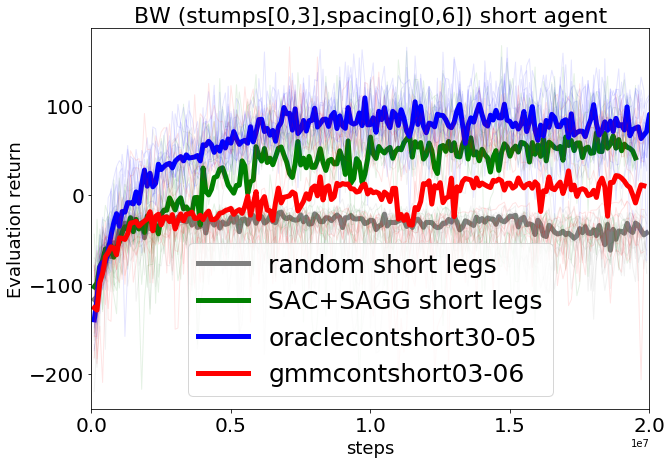

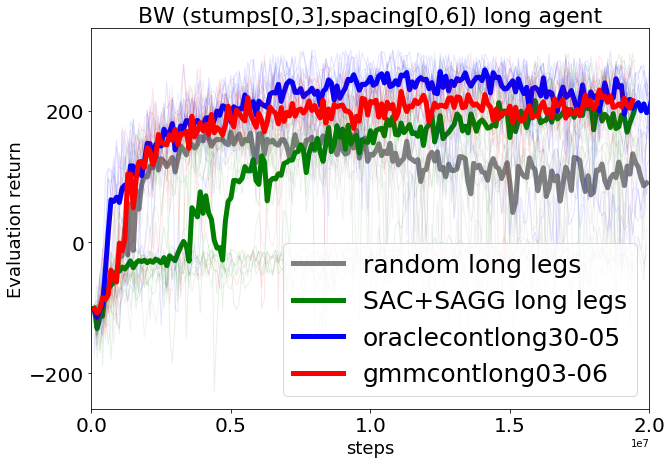

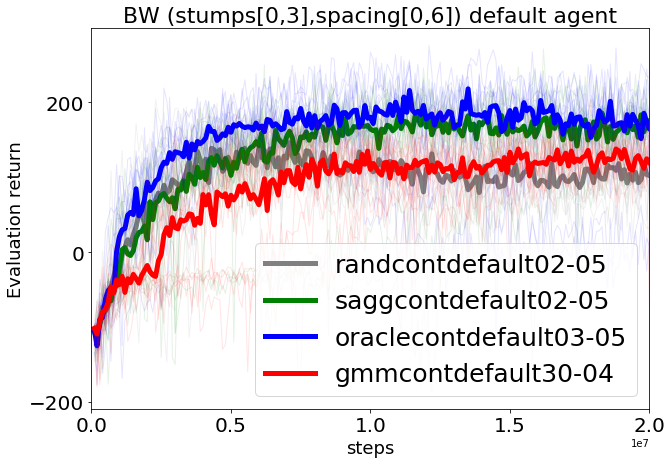

In [65]:
#PER AGENT PERFS
agent_types = ["short","long","default"]
plt.ion()
for a_type in agent_types:
    f, ax = plt.subplots(1,1,figsize=(10,7))
    ax = [ax]
    for i,(m_id,label) in enumerate(labels.items()):
        if a_type in m_id:
            runs_data = models_saves[m_id]['data']
            ys = []
            for run in runs_data:  
                data = run['evaluation return']
                episodes = np.array(run['total timesteps'])
                ys.append(data)
            #clean data    
            min_len = 999999
            for y in ys:
                if len(y) < min_len:
                    min_len = len(y)
            ys_same_len = []
            for y in ys:
                ys_same_len.append(y[0:min_len])
            episodes = episodes[0:min_len]

            plot_all_and_median(0, ax[0], episodes,ys_same_len,colors[m_id],label,
                                title="BW (stumps[0,3],spacing[0,6]) {} agent".format(a_type), legend=True)
            f.savefig('graphics/all_perfs_{}_agents.png'.format(a_type))
#get_welch(algo_0='saggcont02-05', algo_1="randcont02-05")
        
#plt.savefig("graphics/sac_sagg_vs_random_3_leg_sizes.png", bbox_inches='tight')

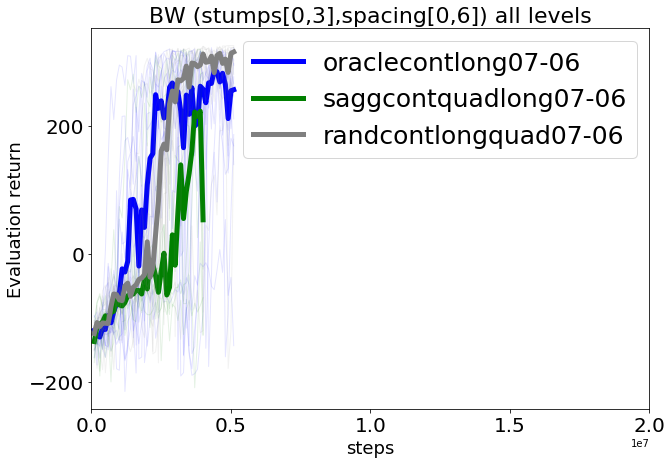

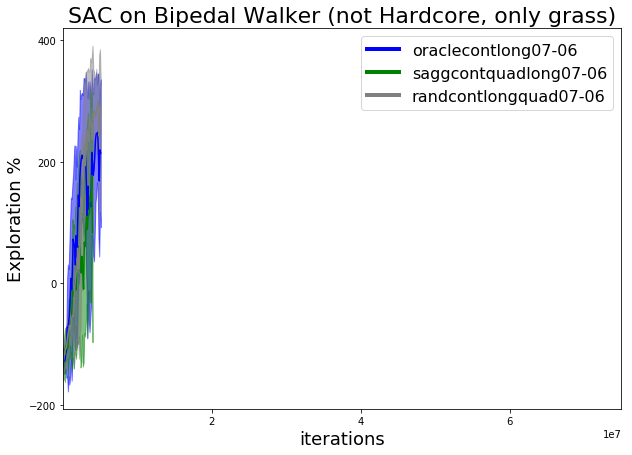

In [79]:
#OVERALL PERFS
plt.ion()
f, ax = plt.subplots(1,1,figsize=(10,7))
ax = [ax]
fm, axm = plt.subplots(1,1,figsize=(10,7))
axm = [axm]
for i,(m_id,label) in enumerate(labels.items()):
    #print(m_id)
    runs_data = models_saves[m_id]['data']
    #print(len(runs_data))
    ys = []
    for run in runs_data:  
        #print(list(run))
        data = run['evaluation return']
        #data = run['AverageEpRet']
        #print(list(run))
        episodes = np.array(run['total timesteps'])
        #print(run['config']['seed'])
        #print(len(run['env_params_train']))
        #print(len(run['env_params_test']))
        ys.append(data)
        #clean data    
    min_len = 999999
    for y in ys:
        if len(y) < min_len:
            min_len = len(y)
    ys_same_len = []
    for y in ys:
        ys_same_len.append(y[0:min_len])
    episodes = episodes[0:min_len]
    
    plot_all_and_median(0, ax[0], episodes,ys_same_len,colors[m_id],label,
                        title="BW (stumps[0,3],spacing[0,6]) all levels", legend=True)
    f.savefig('graphics/sac_sagg_vs_random_3_leg_sizes.png')
    plot_with_std(0, axm[0],episodes,np.mean(ys_same_len,axis=0),np.std(ys_same_len,axis=0),colors[m_id],colors[m_id],label,
                   legend=True, title="SAC on Bipedal Walker (not Hardcore, only grass)")

#get_welch(algo_0='saggcont02-05', algo_1="randcont02-05")
        
#plt.savefig("graphics/sac_sagg_vs_random_3_leg_sizes.png", bbox_inches='tight')

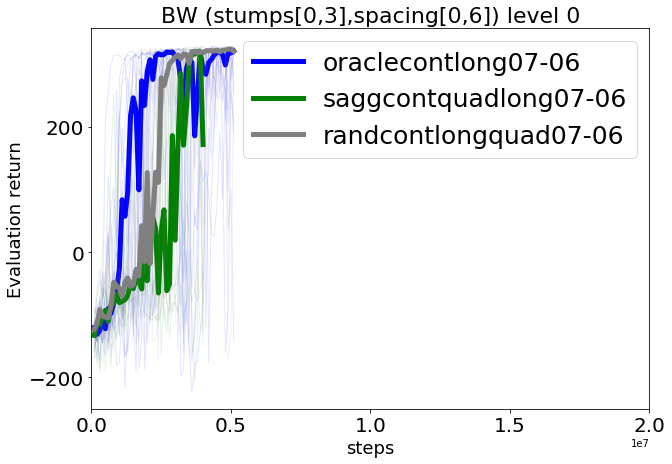

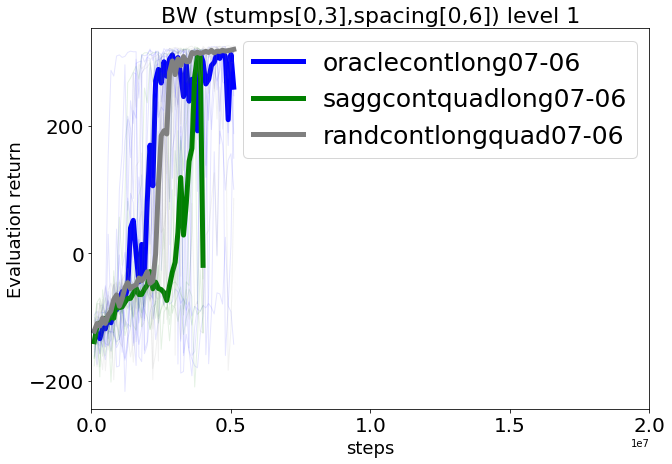

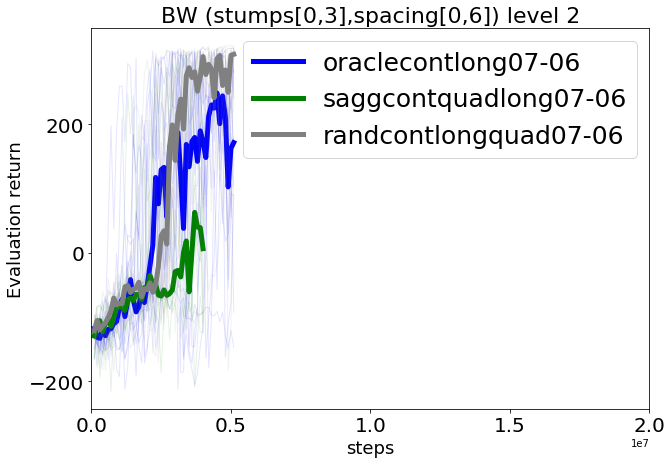

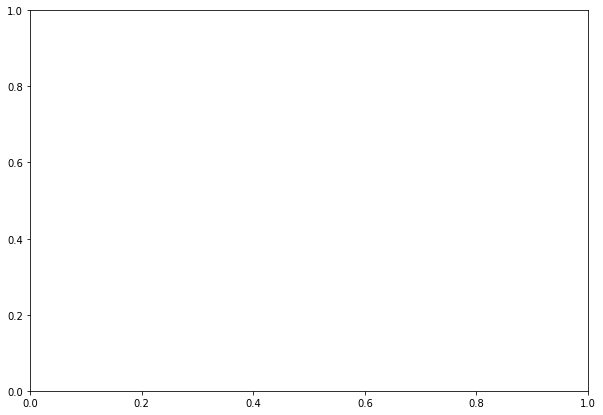

In [80]:
# LEVELS PERFS
nb_levels = 3
nb_tests_per_epochs = 15
level_step = int(nb_tests_per_epochs / nb_levels)
def get_level_ys(runs_data, min_len):
    level_ys = {}
    for i in range(nb_levels):
        level_ys[str(i)] = []
    nb_tests = len(runs_data[0]['env_test_rewards'][0:min_len*nb_tests_per_epochs])
    nb_steps = nb_tests/nb_tests_per_epochs
    steps = np.arange(0,nb_tests,nb_tests_per_epochs)
    #collect raw perfs
    for run in runs_data:
        raw_y = run['env_test_rewards'][0:min_len*nb_tests_per_epochs]
        level_y = {}
        for i in range(nb_levels):
            level_y[str(i)] = []
        for j in steps:
            #print(j)
            test_batch = raw_y[j:j+nb_tests_per_epochs]
            #print(test_batch)
            last_idx = 0
            for i in range(nb_levels):
                level_y[str(i)].append(np.mean(test_batch[last_idx:last_idx+level_step]))
                last_idx = last_idx+level_step
        for k in level_ys.keys():
            level_ys[k].append(level_y[k])
                
    return level_ys
    
    
f0, ax0 = plt.subplots(1,1,figsize=(10,7))
f1, ax1 = plt.subplots(1,1,figsize=(10,7))
f2, ax2 = plt.subplots(1,1,figsize=(10,7))
ax = [ax0,ax1,ax2]
fm, axm = plt.subplots(1,1,figsize=(10,7))
axm = [axm]
for i,(m_id,label) in enumerate(labels.items()):
    runs_data = models_saves[m_id]['data']
    ys = []
    for run in runs_data:  
        data = run['evaluation return']
        episodes = np.array(run['total timesteps'])
        ys.append(data) 
    #clean data   
    min_len = 999999
    for y in ys:
        if len(y) < min_len:
            min_len = len(y)
    ys_same_len = []
    for y in ys:
        ys_same_len.append(y[0:min_len])
    episodes = episodes[0:min_len]
    level_ys = get_level_ys(runs_data, min_len)
    for k,lvl_ys in level_ys.items():
            plot_all_and_median(0, ax[int(k)], episodes,lvl_ys,colors[m_id],label=label,
                                title="BW (stumps[0,3],spacing[0,6]) level "+k, legend=True)
f0.savefig('graphics/SAC_BW_stumps[0,2]_level0.png')
f1.savefig('graphics/SAC_BW_stumps[0,2]_level1.png')
f2.savefig('graphics/SAC_BW_stumps[0,2]_level2.png')
    
#             plot_with_std(0, ax[int(k)],episodes,np.mean(lvl_ys,axis=0),np.std(lvl_ys,axis=0),colors[m_id],colors[m_id],label,
#                            legend=True, title="SAC on Bipedal Walker (not Hardcore, only grass)")


In [12]:
from param_env_utils.active_goal_sampling import SAGG_IAC
import matplotlib.patches as patches
from param_env_utils.imgep_utils.gep_utils import scale_vector
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import matplotlib.colorbar as cbar

def scatter_plot_gif(data,nb_steps=50, name='test', xlim=None, ylim=None, fs=(7,7)):
    plt.ioff()
    length = len(data)
    step_size = int(length / nb_steps)
    print("Making an exploration GIF of {} steps".format(nb_steps))
    filenames = []
    for i,max_episodes in enumerate(np.arange(step_size,length+step_size,step_size)):
        scatter_plot(data[0:max_episodes],
                     emph_data=data[max_episodes-step_size:max_episodes],
                     xlim=xlim, ylim=ylim, fs=fs)
        f_name = "graphics/gifs/scatter_{}.png".format(i)
        plt.xlim(xmin=xlim[0],xmax=xlim[1])
        plt.ylim(ymin=ylim[0],ymax=ylim[1])
        plt.savefig(f_name, bbox_inches='tight')
        plt.close(f)
        filenames.append(f_name)
    images = []
    for filename in filenames:
        images.append(imageio.imread(filename))
    imageio.mimsave('graphics/scatter_gif_{}.gif'.format(name), images, duration=0.3)


        
def scatter_plot(data, ax=None, emph_data=None, xlim=[0,2], ylim=[0,2],fs=(7,7)):
    #print(ylim)
    if ax is None:
        f, ax = plt.subplots(1,1,figsize=fs)
    Xs,Ys = [d[0] for d in data], [d[1] for d in data]
    if emph_data is not None:
        emphXs,emphYs = [d[0] for d in emph_data], [d[1] for d in emph_data]
    ax.plot(Xs,Ys,'r.',markersize=2)
    ax.set_xlim(xmin=xlim[0],xmax=xlim[1])
    ax.set_ylim(ymin=ylim[0],ymax=ylim[1])
    ax.axis('equal')
    if emph_data is not None:
        ax.plot(emphXs,emphYs,'b.',markersize=5)
    ax.set_xlabel('stump height', fontsize=20)
    ax.set_ylabel('spacing', fontsize=20)
        
def plot_regions(boxes, interests, ax=None, xlim=[0,2], ylim=[0,2]):
    # Create figure and axes
    if ax==None:             
        f, ax = plt.gca()
    # Add the patch to the Axes
    for b,ints in zip(boxes,interests):
        #print(b)
        lx,ly = b.low
        hx,hy = b.high
        c = plt.cm.jet(ints)
        rect = patches.Rectangle([lx,ly],(hx - lx),(hy - ly),linewidth=3,edgecolor='white',facecolor=c)
        ax.add_patch(rect)
        #plt.Rectangle([lx,ly],(hx - lx), (hy - ly))

    cax, _ = cbar.make_axes(ax) 
    cb = cbar.ColorbarBase(cax, cmap=plt.cm.jet) 
    cb.set_label('Mean Competence Progress')
    ax.set_xlim(xmin=xlim[0],xmax=xlim[1])
    ax.set_ylim(ymin=ylim[0],ymax=ylim[1])
    ax.axis('equal')
    ax.set_xlabel('stump height', fontsize=20)
    ax.set_ylabel('stump_spacing', fontsize=20)

def region_plot_gif(all_boxes, interests, iterations, goals,
                    gifname='saggriac', rewards=None, ep_len=None,
                    xlim=[0,2], ylim=[0,2], fs=(27,7), plot_step=250):
    plt.ioff()
    print("Making an exploration GIF: "+gifname)
    filenames = []
    images = []
    steps = []
    mean_rewards = []
    for i in range(len(goals)):
        if i>0 and (i%plot_step == 0):
            f, (ax0,ax1, ax2) = plt.subplots(1,3,figsize=fs)
            ax = [ax0,ax1, ax2]
            scatter_plot(goals[0:i], ax=ax[0], emph_data=goals[i-plot_step:i], xlim=xlim, ylim=ylim)
            idx = 0
            cur_idx = 0
            for j in range(len(all_boxes)):
                if iterations[j] > i:
                    break
                else:
                    cur_idx = j

            #ADD TRAINING CURVE
            ax[2].set_ylabel('Train return', fontsize=18)
            steps.append(sum(ep_len[0:i]))
            mean_rewards.append(np.mean(rewards[i-plot_step:i]))
            ax[2].plot(steps,mean_rewards)
            
            plot_regions(all_boxes[cur_idx], interests[cur_idx],ax=ax[1], xlim=xlim, ylim=ylim)
            f_name = "graphics/gifs/scatter_{}.png".format(i)
            plt.suptitle('Episode {}'.format(i), fontsize=20)
            plt.savefig(f_name, bbox_inches='tight')
            plt.close(f)
            filenames.append(f_name)
    for filename in filenames:
        images.append(imageio.imread(filename))
    imageio.mimsave('graphics/{}.gif'.format(gifname), images, duration=0.3)

def extract_env_params(env_goals, order):
    #order = ['stump_hs', 'tunnel_hs']
    flat_env_params = copy.copy(env_goals[order[0]])
    nb_episodes = len(flat_env_params)
    if len(order) == 1:
        pass #work already done
    elif order == ['stump_hs', 'ob_sps']:
        for ep_nb in range(nb_episodes):
                flat_env_params[ep_nb][1] = env_goals['ob_sps'][ep_nb] #ignore variance 
    elif len(order) == 2:
        for ep_nb in range(nb_episodes):
            for i in range(1,len(order)):
                flat_env_params[ep_nb][1] = env_goals[order[i]][ep_nb][0] #ignore variance 
        print(env_goals[order[0]][0])
        print(env_goals[order[1]][1])
        print(flat_env_params[0])
    return flat_env_params

In [ ]:
#PLOT scatter plots
for i,(m_id,d) in enumerate(models_saves.items()):
    print(m_id)
    runs_data = d['data']

    for j,run in enumerate(runs_data):
        #print(j)
        d = run['env_params_train']
        print(d['stump_hs'][0])
        print(d['tunnel_hs'][0])
        print(d.keys())
        print(run['config']['seed'])
        order = []
        if d['stump_hs'][0]:
            order.append('stump_hs')
        if d['tunnel_hs'][0]:
            order.append('tunnel_hs')
        if d['ob_sps'][0]:
            order.append('ob_sps')
        print(order)
        
        scatter_plot(extract_env_params(d, order), xlim=[0,3], ylim=[0,6], fs=(4,8))
        plt.show()
        break
            
#         scatter_plot_gif(extract_env_params(d, order),
#                           name='{}{}'.format(m_id, j), xlim=[0,2], ylim=[0,6])


In [ ]:
import importlib
import param_env_utils.active_goal_sampling as gsamp
importlib.reload(gsamp)
#Testing sagg_iac
print(list(models_saves))
data = models_saves['sac_lgwidestumpnoinputlevels']['data'][5]
print(len(data['env_params_train']))
print(len(data['env_train_rewards']))
env_goals = data['env_params_train']
reward_outcome = data['env_train_rewards']
#scatter_plot(env_goals)
ndims = 2
SAGG = gsamp.SAGG_RIAC(np.array([0.0]*ndims), np.array([2.0]*ndims))
all_boxes = []
iterations = []
interests = []
plot = False
for i,(g,o) in enumerate(zip(env_goals,reward_outcome)):
    split, _ = SAGG.update([np.array(g)], None, continuous_competence=[np.interp(o, (-200, 300), (0,1))])
    if split:
        boxes = SAGG.region_bounds
        interest = SAGG.interest
        if plot:
            plot_regions(boxes, interest)
            plt.show()
        interests.append(copy.copy(interest))
        iterations.append(i)
        all_boxes.append(copy.copy(boxes))

In [47]:
import param_env_utils.imgep_utils.plot_utils as plotter
import importlib
importlib.reload(plotter)
# GIF for algorithms

#scatter_plot(env_goals)
for model_name,_ in models_saves.items():
    print(models_saves[model_name]['data'][0]['config']['env_babbling'])
    #print(models_saves[sagg_model_name]['data'][0]['config']['seed'])
    if models_saves[model_name]['data'][0]['config']['env_babbling'] == 'sagg_iac':
        for i in range(len(models_saves[model_name]['data'])):
            all_boxes = models_saves[model_name]['data'][i]['all_boxes']
            print(len(all_boxes))
            for boxes in all_boxes:
                print(boxes)
            split_iterations = models_saves[model_name]['data'][i]['split_iterations']
            env_train_rewards = models_saves[model_name]['data'][i]['env_train_rewards']
            all_interests = models_saves[model_name]['data'][i]['all_interests']
            env_goals = models_saves[model_name]['data'][i]['env_params_train']
            ep_len = models_saves[model_name]['data'][i]['env_train_len']
            print(list(env_goals))
            #print(env_goals['stump_hs'][0])
            order = []
            if env_goals['stump_hs'][0]:
                order.append('stump_hs')
            if env_goals['tunnel_hs'][0]:
                order.append('tunnel_hs')
            if env_goals['ob_sps'][0]:
                order.append('ob_sps')
            if len(env_goals) >= 2:
                env_goals = extract_env_params(env_goals, order)
                print(len(env_goals))

            if len(all_boxes) == 0:
                print('abort {}'.format(i))
                continue
            print(len(env_goals))
            region_plot_gif(all_boxes, all_interests, split_iterations, env_goals,
                           gifname='SAGG_'+ model_name +str(i), rewards=env_train_rewards,
                            ep_len=ep_len, xlim=[0,2], ylim=[0,6], fs=(12,9),
                           plot_step = 500)
    elif models_saves[model_name]['data'][0]['config']['env_babbling'] == 'gmmlkjlkj':
        for i in range(len(models_saves[model_name]['data'])):
            bk = models_saves[model_name]['data'][i]
            # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! !!!!!!!!!!!!!!!!!!!!!! TODO REMOVE
            bk['goals_lps'] = bk['goals_lps'][-len(bk['env_train_rewards']):]
            print()
            plotter.gmm_plot_gif(models_saves[model_name]['data'][0], gifname='GMM_'+ model_name +str(i),
                                xlim=[0,3],ylim=[0,6], fig_size = (4.5,8))


oracle
sagg_iac
18
[Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(

20
[Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Bo

19
[Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Bo

50
[Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Bo

48
[Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Bo

36
[Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Bo

47
[Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Bo

24
[Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Bo

37
[Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Bo

47
[Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Bo

46
[Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Bo

sagg_iac
74
[Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Bo

73
[Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Bo

65
[Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Bo

73
[Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Bo

83
[Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Bo

77
[Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Bo

61
[Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Bo

56
[Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Bo

sagg_iac
68
[Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Bo

66
[Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Bo

70
[Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Bo

72
[Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Bo

60
[Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Bo

60
[Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Bo

48
[Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Bo

60
[Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Bo

60
[Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Bo

63
[Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Bo

64
[Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Bo

61
[Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Box(2,)]
[Box(2,), Box(2,), Box(2,), Box(2,), Box(2,), Bo

![](graphics/exploration0.gif)
![](graphics/exploration1.gif)


![SegmentLocal](graphics/gmm0.gif "competence")
![SegmentLocal](graphics/onlineSAGGbignet0.gif "competence")
![SegmentLocal](graphics/onlineSAGGbignet1.gif "competence")
![SegmentLocal](graphics/onlineSAGGbignet2.gif "competence")
![SegmentLocal](graphics/onlineSAGGbignet3.gif "competence")
![SegmentLocal](graphics/onlineSAGGbignet4.gif "competence")
![SegmentLocal](graphics/onlineSAGGbignet5.gif "competence")

In [ ]:
lidar = []
self.lidar[i].fraction = 1.0
            self.lidar[i].p1 = pos
            self.lidar[i].p2 = (
                pos[0] + math.sin(1.5*i/10.0)*LIDAR_RANGE,
                pos[1] - math.cos(1.5*i/10.0)*LIDAR_RANGE)

In [ ]:
metrics_mean_explo = [mean_a_explo, mean_p_explo, mean_s_explo, mean_b_explo, mean_c_explo] 
metrics_std_explo = [std_a_explo, std_p_explo, std_s_explo, std_b_explo, std_c_explo]
plot_steps = np.arange(0,nb_episodes+step_size,step_size)
colors = ['red','blue','green','magenta','black','cyan','orange']
shades_colors = ['lightsalmon','skyblue','lightgreen','violet']
title_info = ["agent", "pickaxe", "shovel", "blocks", "cart"]
model_names = titles
metric = ["agent","pickaxe","shovel","blocks","cart"]
maxes=[85,85,85,100,85]

# # Averaged plots
# f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1,5,figsize=(20,4))
# ax = (ax0, ax1, ax2, ax3, ax4)
# print(model_filenames)
# for j, (models_mean_explo, models_std_explo) in enumerate(zip(metrics_mean_explo, metrics_std_explo)):
#     for i,(mean_explo, std_explo) in enumerate(zip(models_mean_explo, models_std_explo)):
#         y = mean_explo
#         err = std_explo
#         title = ''
#         plot_with_std(j, ax[j], plot_steps,y,err,colors[i],shades_colors[i],model_names[i],
#                       y_min=0,y_max=maxes[j], title=title+title_info[j], legend=True)
        
# #plt.savefig("graphics/grid_cell_exploration_mmc.pdf", bbox_inches='tight')
# #plt.savefig("grid_cell_exploration_samebt.png", bbox_inches='tight')
# plt.show()

#PLOT ALL + MEDIAN
all_explo = [all_a_explo, all_p_explo, all_s_explo, all_b_explo, all_c_explo]
f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1,5,figsize=(20,4))
ax = (ax0, ax1, ax2, ax3, ax4)
print(model_filenames)
for j, models_all_explo in enumerate(all_explo):
    for i, explo in enumerate(models_all_explo):
        ys = explo
        title = ''
        plot_all_and_median(j, ax[j], plot_steps,ys,colors[i],shades_colors[i],model_names[i],
                      y_min=0,y_max=maxes[j], title=title+title_info[j], legend=True)
plt.savefig("graphics/grid_cell_exploration_mmc.png", bbox_inches='tight')


In [ ]:
def plot_with_std(x,y,err,color,shade_color,label,y_min,y_max):
    plt.plot(x,y, color=color, label=label,linewidth=1.5)
    plt.fill_between(x,y-err,y+err,color=shade_color,alpha=0.5)
    leg = plt.legend(loc='lower right')
    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)
    plt.xlabel('episodes')
    plt.ylabel('exploration %')
    if y_min is not None:
        plt.ylim(ymin=y_min,ymax=y_max)
    

labels = ['RND','F-RGB','RMB','AMB']
shades_colors = ['lightsalmon','skyblue','lightgreen','violet']
print("agent exploration")
x = np.arange(0,nb_episodes+step_size,step_size)
for i in range(nb_models):
    print(std_a_explo[i,-1])
    y = mean_a_explo[i,:]
    err = std_a_explo[i,:]
    plot_with_std(x,y,err,colors[i],shades_colors[i],labels[i],0,100)
#plt.savefig("dist_agent_pos_expl.pdf", bbox_inches='tight')
plt.show()

print("shovel exploration")
x = np.arange(0,nb_episodes+step_size,step_size)
for i in range(nb_models):
    print(std_s_explo[i,-1])
    y = mean_s_explo[i,:]
    err = std_s_explo[i,:]
    plot_with_std(x,y,err,colors[i],shades_colors[i],labels[i],0,100)
#plt.savefig("dist_agent_pos_expl.pdf", bbox_inches='tight')
plt.show()

print("pickaxe exploration")
x = np.arange(0,nb_episodes+step_size,step_size)
for i in range(nb_models):
    print(std_p_explo[i,-1])
    y = mean_p_explo[i,:]
    err = std_p_explo[i,:]
    plot_with_std(x,y,err,colors[i],shades_colors[i],labels[i],0,100)
#plt.savefig("dist_agent_pos_expl.pdf", bbox_inches='tight')
plt.show()

print("cart")
for i in range(nb_models):
    print(std_c_explo[i,-1])
    y = mean_c_explo[i,:]
    err = std_c_explo[i,:]
    plot_with_std(x,y,err,colors[i],shades_colors[i],labels[i],0,100)
#plt.savefig("dist_cart_pos_expl.pdf", bbox_inches='tight')
plt.show()

print("blocks")
for i in range(nb_models):
    y = mean_b_explo[i,:]
    err = std_b_explo[i,:]
    plot_with_std(x,y,err,colors[i],shades_colors[i],labels[i],0,100)
#plt.savefig("dist_bread_pos_expl.pdf", bbox_inches='tight')
plt.show()
#plt.plot(mean_a_explo, color='red', label=m_name.replace('_',' '))
#plt.plot(mean_c_explo, color='blue', label=m_name.replace('_',' '))
#plt.plot(mean_b_explo, color='green', label=m_name.replace('_',' '))
        

In [ ]:
def plot_interests(ax,subplot_nb,interest_dict, legend=True, labels=None):
    ax.locator_params(axis='x', nbins=5)
    ax.locator_params(axis='y', nbins=5)
    colors = ['red','blue','green','magenta','black',
              'cyan','orange','powderblue','salmon','aqua','darkolivegreen',
             'orchid','indigo','saddlebrown']
    for i,(name,interests) in enumerate(sorted(interest_dict.items())):
        #print(name)
        if labels is not None:
            ax.plot(interests, color=colors[i], label=labels[i],linewidth=1.5)
        else:
            ax.plot(interests, color=colors[i], label=name.replace('_',' '),linewidth=1.5)
    if subplot_nb == 0:
        ax.set_ylabel('Interest', fontsize=18)
        
    ax.set_xlabel('Iterations', fontsize=18)
    if legend:
        leg = ax.legend(loc='upper left')
        for legobj in leg.legendHandles:
            legobj.set_linewidth(4.0)

short_labels = ['agent','bread','cart','distr 1','distr 2','distr 3', 'distr 4']

# Plot interest curves:

for i in range(9):
    f, (ax0, ax1) = plt.subplots(1,2,figsize=(16,4))
    ax = (ax0, ax1)
    ints = saves[model_filenames[2]][i]['interests']
    plot_interests(ax[0],0,ints,legend=True,labels=None)
#plt.savefig("aaa_newold_interests_samebt.png", bbox_inches='tight')




In [ ]:
# PLOT 3 SAMPLES OF AMB INTERESTS
f, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(24,4))
ax = (ax0, ax1, ax2)
for i,run_nb in enumerate([0,3,8]):
    ints = saves[model_filenames[2]][run_nb]['interests']
    plot_interests(ax[i],i,ints,legend=True,labels=None)
plt.savefig("graphics/interest_curves_amb_mmc.png", bbox_inches='tight')


In [ ]:
# Plot competence evolution for amb runs
f, (ax0, ax1) = plt.subplots(1,2,figsize=(20,4))
ax = (ax0, ax1)
m_names = ['pickaxe_end_pos']

for i in range(1):
    dists = {}
    for m_name in m_names:
        
        all_goals = saves[model_filenames[2]][1]['modules'][m_name].generated_goals
        all_outs = saves[model_filenames[2]][1]['modules'][m_name].observed_outcomes
        print(len(all_goals))
        print(len(all_outs))
        goals = np.array([all_goals[k-1] for k in range(5,len(all_goals),5)])
        outs = np.array([all_outs[k-1] for k in range(5,len(all_outs),5)])
        print(goals[-5:])
        print(outs[-5:])
        d = np.linalg.norm(goals - outs,axis=1)
        dists[m_name] = d
    #euc_d2 = np.linalg.norm(goals - outs,axis=1)
#     print(goals[0:3])
#     print(outs[0:3])
#     print(dists[0:3])
#     print(euc_d[0:3])
#     print(euc_d2[0:3])
#     print("h")
    plot_interests(ax[i],i,dists,legend=False,labels=None)

In [ ]:
# get interest curves names:
labels_2 = [s.replace('_',' ') for s in np.unique(saves[model_filenames[3]][0]['choosen_modules'])]

#labels = ['agent final position','bread final count','cart final position',
#               'fixed distractor 1 final position','fixed distractor 2 final position','moving distractor 1 final position', 'moving distractor 2 final position']
colors = ['red','blue','green','magenta','black','cyan','orange']

fig = pylab.figure()
figlegend = pylab.figure(figsize=(3.5,2))
ax = fig.add_subplot(111)
line_data = []
#for i in range(len(labels)):
#    line_data.append([range(10), pylab.randn(10), colors[i]])
print(len(labels_2))
if len(labels_2) == 3:
    lines = ax.plot(range(10),pylab.randn(10),colors[0],
                    range(10),pylab.randn(10),colors[1],
                    range(10),pylab.randn(10),colors[2])
elif len(labels_2) == 5:
    lines = ax.plot(range(10),pylab.randn(10),colors[0],
                    range(10),pylab.randn(10),colors[1],
                    range(10),pylab.randn(10),colors[2],
                    range(10),pylab.randn(10),colors[3],
                    range(10),pylab.randn(10),colors[4])
    
leg = figlegend.legend(lines, labels_2[:len(labels_2)], 'center')
for legobj in leg.legendHandles:
            legobj.set_linewidth(6.0)
        
figlegend.show()
figlegend.savefig('legend.png')

In [ ]:
# Time complexity analysis
for m_name, m_id in zip(model_full_names,model_filenames):
    print(m_id)
    b_k = saves[m_id][4]
    if 'runtimes' in b_k:
        rts = b_k['runtimes']
        #print(rts['produce'][-100:])
        plt.plot(rts['produce'],label='choose policy')
        plt.plot(rts['run'],label='run episode')
        plt.plot(rts['perceive'],label='add to memory')
        plt.legend()
        plt.ylabel('seconds')
        plt.xlabel('episodes')
    plt.savefig("time_complexity.png")
    plt.show()


In [ ]:
Xs,Ys = [],[]
plt.figure()
epsilon = 1e-3
for i in range(500):
    random_stump_height = (np.random.random(2) * 2.0)
    random_stump_height.sort()
    if np.abs(random_stump_height[1] - random_stump_height[0]) < epsilon:
        random_stump_height[1] += epsilon
    Xs.append(random_stump_height[0])
    Ys.append(random_stump_height[1])
plt.plot(Xs,Ys,'r.')
plt.axis('equal')
plt.show()

Xs,Ys = [],[]
plt.figure()
epsilon = 1e-3
for i in range(500):
    min_stump_height = np.random.uniform(0,2.0)
    max_stump_height = np.random.uniform(min_stump_height,2.0)
    Xs.append(min_stump_height)
    Ys.append(max_stump_height)
plt.plot(Xs,Ys,'r.')
plt.axis('equal')
plt.show()

In [ ]:
a = []
a.append([1,3])
a.append([1,2])
print(len(a))